In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
sherlock_db = niidb.FMriActivationsDb('data/sherlock.db', mask='/data/eli/sherlock/movie_files/wholebrain.nii.gz')

In [5]:
dtfa = DTFA.DeepTFA(sherlock_db.all(), mask='/data/eli/sherlock/movie_files/wholebrain.nii.gz', num_factors=100, embedding_dim=2)

06/16/2018 19:32:05 Loading Nifti image /data/eli/sherlock/movie_files/sherlock_movie_s10.nii with mask /data/eli/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/16/2018 19:32:16 Loading Nifti image /data/eli/sherlock/movie_files/sherlock_movie_s13.nii with mask /data/eli/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/16/2018 19:32:27 Loading Nifti image /data/eli/sherlock/movie_files/sherlock_movie_s2.nii with mask /data/eli/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/16/2018 19:32:38 Loading Nifti image /data/eli/sherlock/movie_files/sherlock_movie_s15.nii with mask /data/eli/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/16/2018 19:32:49 Loading Nifti image /data/eli/sherlock/movie_files/sherlock_movie_s17.nii with mask /data/eli/sherlock/movie_files/wholebrain.nii.gz (zscore=False)
06/16/2018 19:33:00 Loading Nifti image /data/eli/sherlock/movie_files/sherlock_movie_s14.nii with mask /data/eli/sherlock/movie_files/wholebrain.nii.gz (zscore=

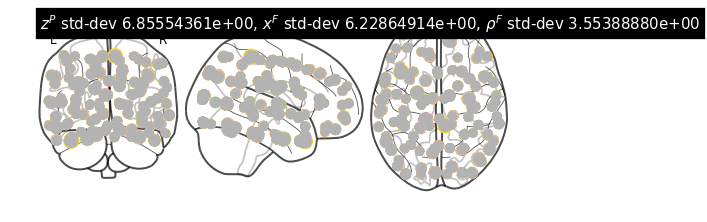

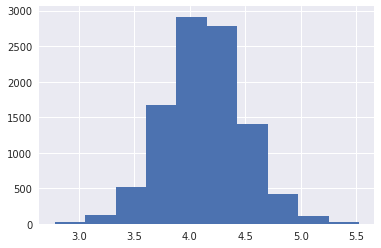

(<nilearn.plotting.displays.OrthoProjector at 0x7ff25801d0b8>,
 tensor([[[-29.8968,  10.0054,  20.2423],
          [ 36.3541, -46.7756,   3.7319],
          [ 21.0769,  32.6307,   4.6457],
          ...,
          [-28.6342, -58.8016, -23.3626],
          [ 25.7981, -64.0719, -19.8172],
          [ 14.7242, -29.7195,   5.4525]],
 
         [[-30.0487,  10.1973,  19.4941],
          [ 36.3129, -46.7247,   4.7213],
          [ 21.9404,  32.7780,   4.6148],
          ...,
          [-28.6178, -59.0368, -23.7556],
          [ 25.8343, -64.0703, -19.6767],
          [ 14.6080, -29.6534,   5.3280]],
 
         [[-30.0605,  10.0893,  19.1362],
          [ 36.7327, -46.4783,   3.6652],
          [ 21.3722,  32.6255,   4.9927],
          ...,
          [-28.2565, -58.8840, -23.2117],
          [ 24.5577, -64.4140, -19.9645],
          [ 15.2616, -29.1231,   5.4263]],
 
         ...,
 
         [[-30.1523,  10.0105,  18.7847],
          [ 37.1209, -46.5579,   3.8543],
          [ 21.5582,  32.59

In [6]:
dtfa.visualize_factor_embedding()

In [7]:
losses = dtfa.train(num_steps=700, learning_rate=1e-2, log_level=logging.INFO, num_particles=2,
                    batch_size=8, use_cuda=True, checkpoint_steps=50, blocks_batch_size=2, patience=30)

06/16/2018 19:38:41 [Epoch 1] (82790ms) Posterior free-energy 6.92085888e+08 = KL from prior 2.72079525e+06 - log-likelihood -6.89365376e+08
06/16/2018 19:38:41 Saving checkpoint...
06/16/2018 19:40:03 [Epoch 2] (82548ms) Posterior free-energy 6.88311680e+08 = KL from prior 1.17626638e+06 - log-likelihood -6.87135616e+08
06/16/2018 19:41:25 [Epoch 3] (81441ms) Posterior free-energy 6.88163584e+08 = KL from prior 1.03612231e+06 - log-likelihood -6.87127296e+08
06/16/2018 19:42:35 [Epoch 4] (69710ms) Posterior free-energy 6.88398784e+08 = KL from prior 1.00495156e+06 - log-likelihood -6.87393664e+08
06/16/2018 19:43:45 [Epoch 5] (70241ms) Posterior free-energy 6.88132032e+08 = KL from prior 1.00266850e+06 - log-likelihood -6.87129152e+08
06/16/2018 19:44:55 [Epoch 6] (69763ms) Posterior free-energy 6.88088576e+08 = KL from prior 9.60410000e+05 - log-likelihood -6.87127936e+08
06/16/2018 19:46:05 [Epoch 7] (70658ms) Posterior free-energy 6.88075392e+08 = KL from prior 9.47309250e+05 - log

Epoch   291: reducing learning rate of group 0 to 5.0000e-03.


06/17/2018 02:04:31 [Epoch 293] (82024ms) Posterior free-energy 5.20309344e+08 = KL from prior 4.53465250e+06 - log-likelihood -5.15774560e+08
06/17/2018 02:05:53 [Epoch 294] (81979ms) Posterior free-energy 5.18246688e+08 = KL from prior 4.53581300e+06 - log-likelihood -5.13710912e+08
06/17/2018 02:07:15 [Epoch 295] (82023ms) Posterior free-energy 5.17713088e+08 = KL from prior 4.54814400e+06 - log-likelihood -5.13165184e+08
06/17/2018 02:08:37 [Epoch 296] (81836ms) Posterior free-energy 5.17494048e+08 = KL from prior 4.55580150e+06 - log-likelihood -5.12938016e+08
06/17/2018 02:09:59 [Epoch 297] (82026ms) Posterior free-energy 5.17369088e+08 = KL from prior 4.55966050e+06 - log-likelihood -5.12809440e+08
06/17/2018 02:11:21 [Epoch 298] (82065ms) Posterior free-energy 5.17325920e+08 = KL from prior 4.57036400e+06 - log-likelihood -5.12755584e+08
06/17/2018 02:12:43 [Epoch 299] (81988ms) Posterior free-energy 5.17234592e+08 = KL from prior 4.58158150e+06 - log-likelihood -5.12653536e+08

Epoch   366: reducing learning rate of group 0 to 2.5000e-03.


06/17/2018 03:43:46 [Epoch 368] (70280ms) Posterior free-energy 5.16778048e+08 = KL from prior 4.69458750e+06 - log-likelihood -5.12083392e+08
06/17/2018 03:44:56 [Epoch 369] (70181ms) Posterior free-energy 5.16207520e+08 = KL from prior 4.68798200e+06 - log-likelihood -5.11519712e+08
06/17/2018 03:46:06 [Epoch 370] (70167ms) Posterior free-energy 5.15980832e+08 = KL from prior 4.69398550e+06 - log-likelihood -5.11286688e+08
06/17/2018 03:47:17 [Epoch 371] (70308ms) Posterior free-energy 5.15878880e+08 = KL from prior 4.69181700e+06 - log-likelihood -5.11186944e+08
06/17/2018 03:48:26 [Epoch 372] (69888ms) Posterior free-energy 5.15859488e+08 = KL from prior 4.69947550e+06 - log-likelihood -5.11160192e+08
06/17/2018 03:49:44 [Epoch 373] (77731ms) Posterior free-energy 5.15811584e+08 = KL from prior 4.69814450e+06 - log-likelihood -5.11113408e+08
06/17/2018 03:51:05 [Epoch 374] (81168ms) Posterior free-energy 5.15811712e+08 = KL from prior 4.70150600e+06 - log-likelihood -5.11110304e+08

Epoch   582: reducing learning rate of group 0 to 1.2500e-03.


06/17/2018 08:28:24 [Epoch 584] (82000ms) Posterior free-energy 5.14871584e+08 = KL from prior 4.78756350e+06 - log-likelihood -5.10083648e+08
06/17/2018 08:29:46 [Epoch 585] (82240ms) Posterior free-energy 5.14781568e+08 = KL from prior 4.78567300e+06 - log-likelihood -5.09995872e+08
06/17/2018 08:31:09 [Epoch 586] (82630ms) Posterior free-energy 5.14639936e+08 = KL from prior 4.78545900e+06 - log-likelihood -5.09854624e+08
06/17/2018 08:32:31 [Epoch 587] (82611ms) Posterior free-energy 5.14578528e+08 = KL from prior 4.78422050e+06 - log-likelihood -5.09794112e+08
06/17/2018 08:33:53 [Epoch 588] (82017ms) Posterior free-energy 5.14532928e+08 = KL from prior 4.78520250e+06 - log-likelihood -5.09747552e+08
06/17/2018 08:35:15 [Epoch 589] (82162ms) Posterior free-energy 5.14520096e+08 = KL from prior 4.78836200e+06 - log-likelihood -5.09731648e+08
06/17/2018 08:36:38 [Epoch 590] (82519ms) Posterior free-energy 5.14492128e+08 = KL from prior 4.78895400e+06 - log-likelihood -5.09703456e+08

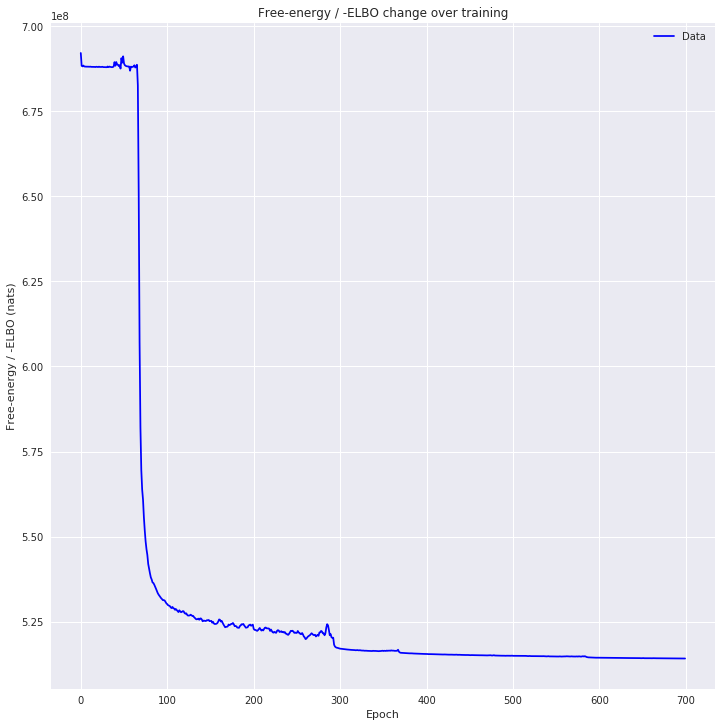

In [8]:
utils.plot_losses(losses)

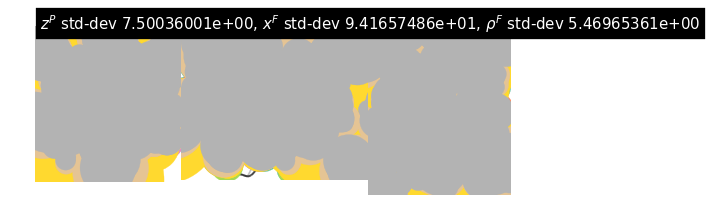

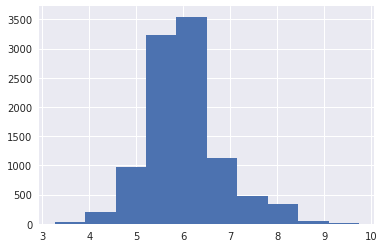

(<nilearn.plotting.displays.OrthoProjector at 0x7fef7d3ef208>,
 tensor([[[-3.5282e+01,  3.5331e+01,  5.4858e+00],
          [ 3.2272e+01, -5.2186e+01,  1.4208e+01],
          [ 2.9912e+01,  3.8454e+01, -5.3642e-01],
          ...,
          [-3.6259e+01, -7.0764e+01, -3.5189e+01],
          [ 3.3858e+01, -8.6202e+01, -6.4358e+00],
          [ 1.8364e+01, -2.3953e+01, -8.4276e-01]],
 
         [[-3.7547e+01,  3.6156e+01,  1.0063e+01],
          [ 3.3575e+01, -4.8525e+01,  1.5944e+01],
          [ 2.7260e+01,  3.7288e+01, -5.6436e-01],
          ...,
          [-3.6817e+01, -6.7690e+01, -3.5918e+01],
          [ 3.6550e+01, -8.5900e+01, -4.0036e+00],
          [ 2.2239e+01, -2.3537e+01, -6.0113e-01]],
 
         [[-2.9316e+01,  3.2349e+01,  8.0696e+00],
          [ 3.6754e+01, -5.4843e+01,  4.0329e+00],
          [ 2.6112e+01,  3.4492e+01,  8.5682e+00],
          ...,
          [-3.0610e+01, -7.0883e+01, -2.8981e+01],
          [ 2.8657e+01, -8.2860e+01, -6.3165e+00],
          [ 2.1928e

In [9]:
dtfa.visualize_factor_embedding()

In [10]:
def task_labeler(b):
    return b.task

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


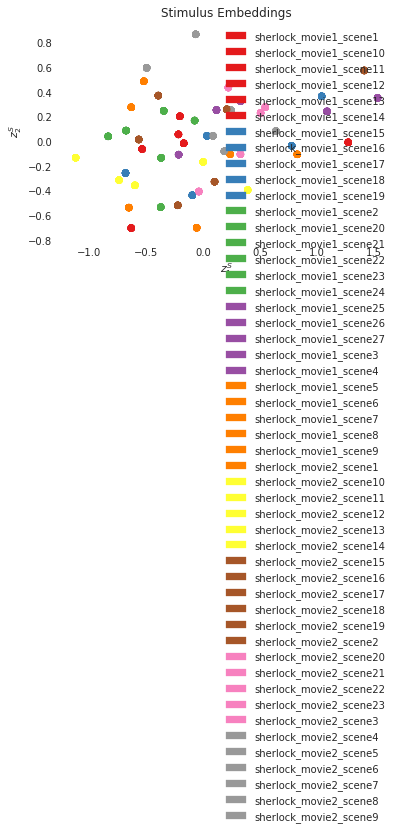

In [11]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None)

In [12]:
def subject_labeler(block):
    return 'Subject %d' % block.subject

def subject_run_labeler(block):
    return 'sub%drun%d' % (block.subject, block.run)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


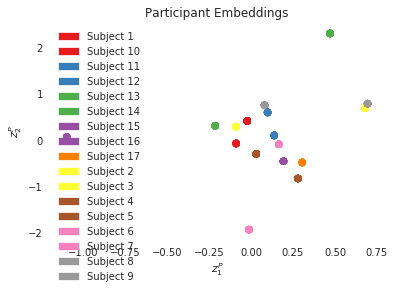

In [13]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


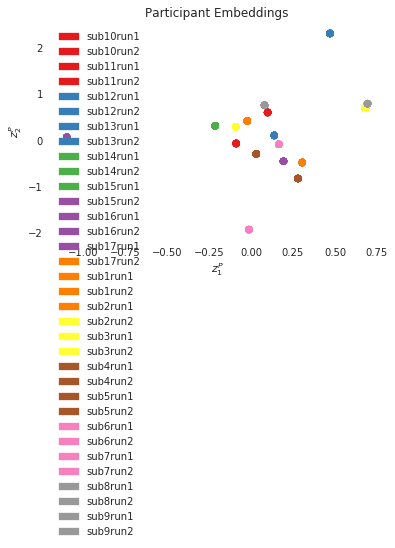

In [14]:
dtfa.scatter_subject_embedding(labeler=subject_run_labeler, figsize=None)

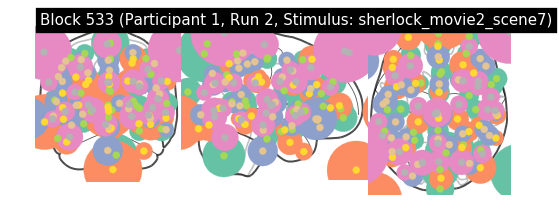

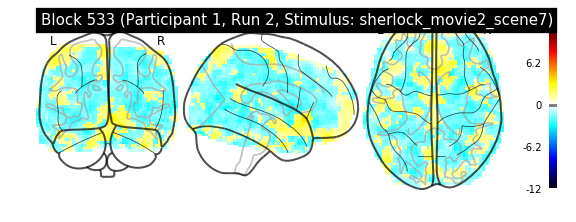

06/17/2018 11:06:40 Reconstruction Error (Frobenius Norm): 2.02117847e+03 out of 2.13418237e+03


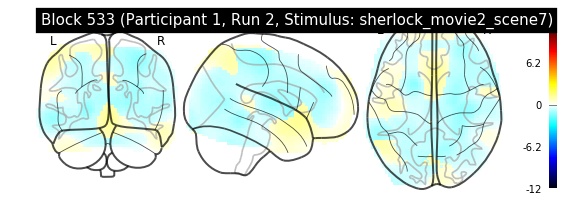

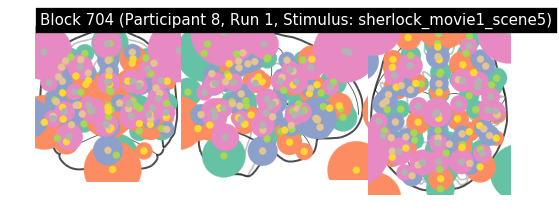

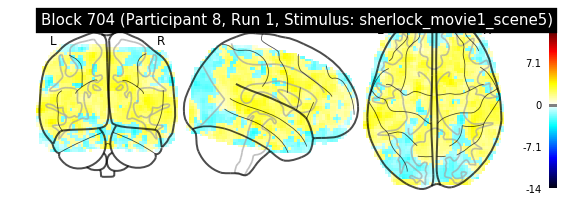

06/17/2018 11:06:46 Reconstruction Error (Frobenius Norm): 1.18142175e+03 out of 1.28132007e+03


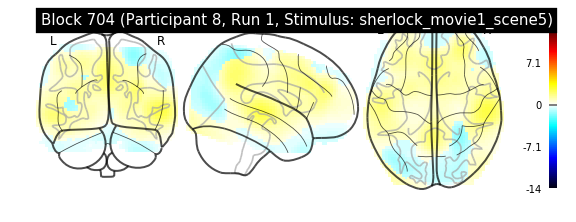

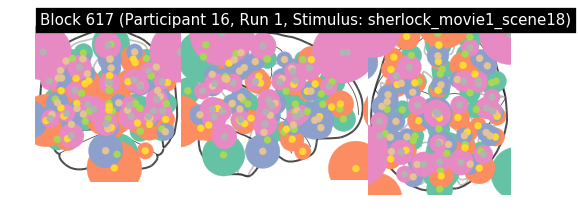

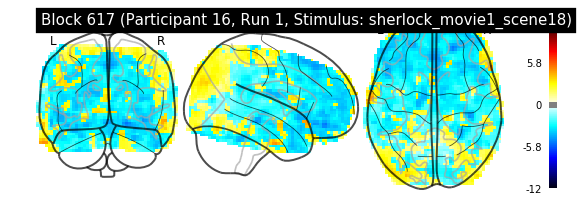

06/17/2018 11:06:50 Reconstruction Error (Frobenius Norm): 8.64329529e+02 out of 1.10859448e+03


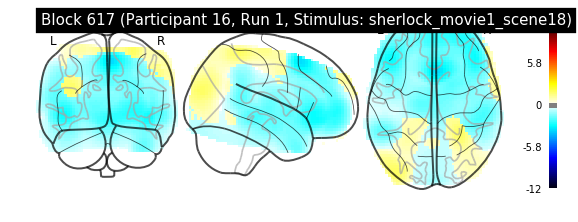

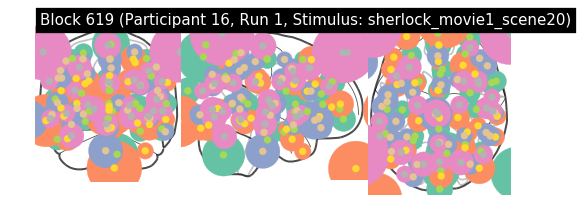

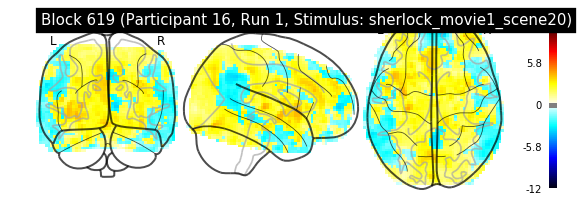

06/17/2018 11:06:55 Reconstruction Error (Frobenius Norm): 1.05045044e+03 out of 1.18984485e+03


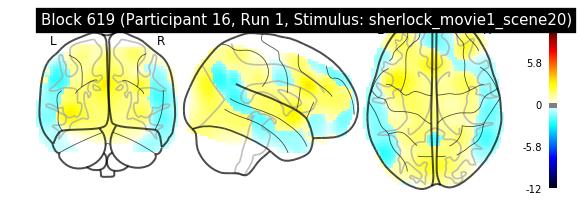

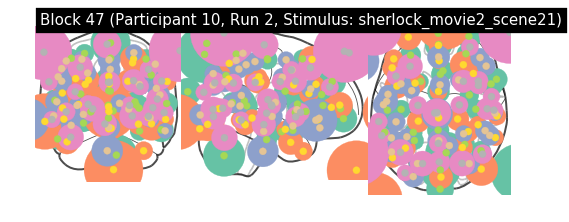

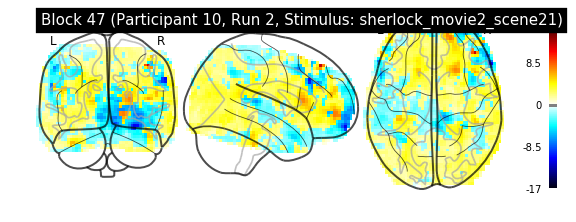

06/17/2018 11:07:03 Reconstruction Error (Frobenius Norm): 1.86622937e+03 out of 1.91355090e+03


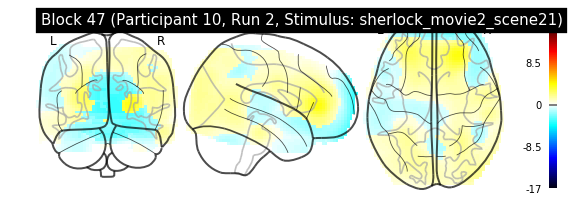

In [15]:
for b in np.random.choice(range(dtfa.num_blocks), 5):
    dtfa.plot_factor_centers(b)
    dtfa.plot_original_brain(b)
    dtfa.plot_reconstruction(b)